In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
#find list of in-built datasets in seaborn

sns.get_dataset_names()

C:\Users\shashank.rampelly\Anaconda3\lib\site-packages\seaborn\utils.py:384: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 384 of the file C:\Users\shashank.rampelly\Anaconda3\lib\site-packages\seaborn\utils.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  gh_list = BeautifulSoup(http)


['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'tips',
 'titanic']

In [3]:
#load dataset to a variable 
df = sns.load_dataset('titanic')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [4]:
df.describe()

#sibsp - Number of Siblings/Spouses Aboard
#parch - Number of Parents/Children Aboard
#Pclass- socio-economic status (SES)  1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower
#embarked - where the passenger boarded

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Info on Titanic data - http://campus.lakeforest.edu/frank/FILES/MLFfiles/Bio150/Titanic/TitanicMETA.pdf

In [16]:
#Seems like all do not have age entry
df[df['age'].isnull()]

,survived,pclass,sex,age,sibsp,parch,fare,deck,embark_town,alone
5,0,3,male,NaN,0,0,8.4583,NaN,Queenstown,True
17,1,2,male,NaN,0,0,13.0000,NaN,Southampton,True
19,1,3,female,NaN,0,0,7.2250,NaN,Cherbourg,True
26,0,3,male,NaN,0,0,7.2250,NaN,Cherbourg,True
28,1,3,female,NaN,0,0,7.8792,NaN,Queenstown,True
...,...,...,...,...,...,...,...,...,...,...
859,0,3,male,NaN,0,0,7.2292,NaN,Cherbourg,True
863,0,3,female,NaN,8,2,69.5500,NaN,Southampton,False
868,0,3,male,NaN,0,0,9.5000,NaN,Southampton,True
878,0,3,male,NaN,0,0,7.8958,NaN,Southampton,True


In [6]:
df = df.drop(columns =['alive','who','adult_male','class', 'embarked'])

In [17]:
#Who paid more
print('Paid more list')
df[df['fare'] == df['fare'].max()]

Paid more list


,survived,pclass,sex,age,sibsp,parch,fare,deck,embark_town,alone
258,1,1,female,35.0,0,0,512.3292,NaN,Cherbourg,True
679,1,1,male,36.0,0,1,512.3292,B,Cherbourg,False
737,1,1,male,35.0,0,0,512.3292,B,Cherbourg,True


In [8]:
#Who not paid
print('Paid zero list')
df[df['fare'] == df['fare'].min()].sort_values('pclass')


Paid zero list


,survived,pclass,sex,age,sibsp,parch,fare,deck,embark_town,alone
263,0,1,male,40.0,0,0,0.0,B,Southampton,True
633,0,1,male,NaN,0,0,0.0,NaN,Southampton,True
806,0,1,male,39.0,0,0,0.0,A,Southampton,True
815,0,1,male,NaN,0,0,0.0,B,Southampton,True
822,0,1,male,38.0,0,0,0.0,NaN,Southampton,True
277,0,2,male,NaN,0,0,0.0,NaN,Southampton,True
413,0,2,male,NaN,0,0,0.0,NaN,Southampton,True
466,0,2,male,NaN,0,0,0.0,NaN,Southampton,True
481,0,2,male,NaN,0,0,0.0,NaN,Southampton,True
674,0,2,male,NaN,0,0,0.0,NaN,Southampton,True


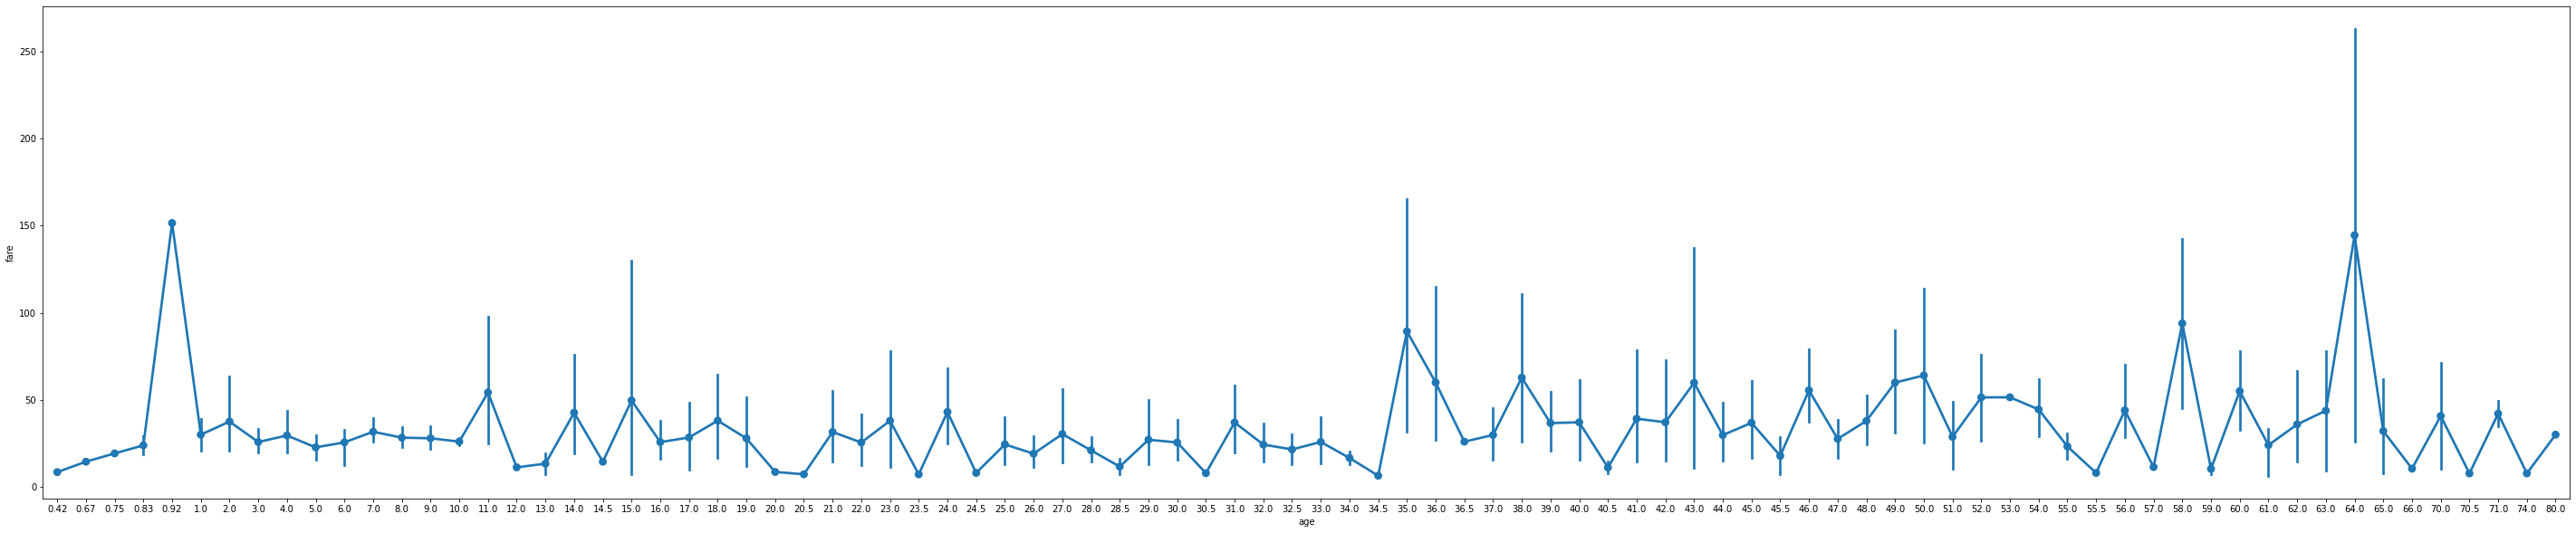

In [18]:
#Pattern by age
sns.pointplot(x="age", y = "fare", data=df)
fig = plt.gcf()
fig.set_size_inches(50,10)

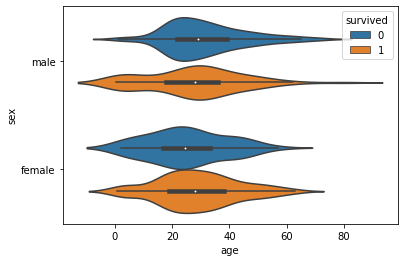

In [10]:
# age wise 
sns.violinplot(x="age",  y="sex", hue="survived", data=df)

AttributeError: 'AxesSubplot' object has no attribute 'color_palette'

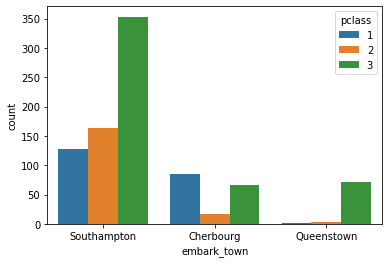

In [33]:
# Bording and class
a = sns.countplot(x="embark_town", hue="pclass",data=df)
a.color_palette("colorblind", 10)                                  #Question to Aditya

Text(0.5, 1.0, 'Genderwise servival')

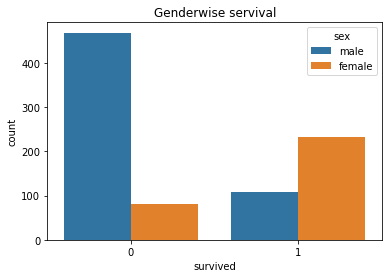

In [12]:
# Genderwise servival
sns.countplot(x="survived", hue="sex", data=df, )
#plt.xticks(["RIP","Survived"])                                 #Question to Aditya
plt.title("Genderwise servival")
#fig = plt.gcf()
#fig.set_size_inches(30,10)

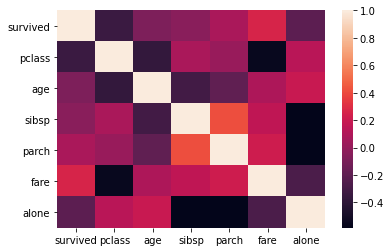

In [44]:
multi_view = df.corr()
sns.heatmap(multi_view)

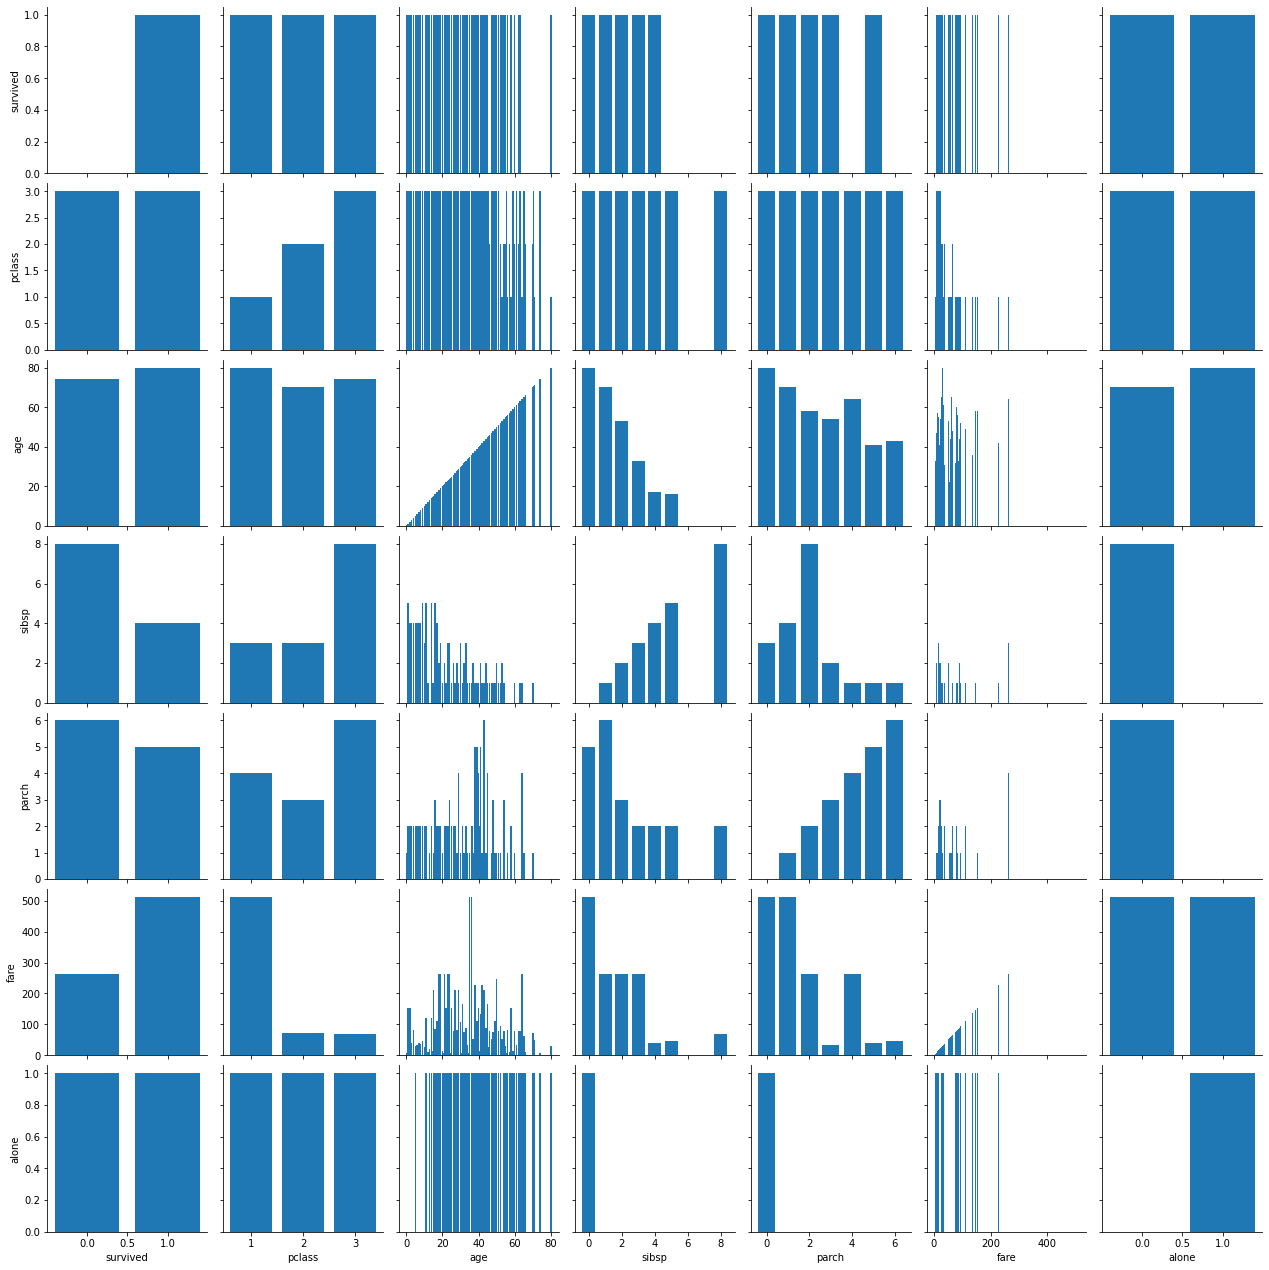

In [14]:
# Best example of unilateral
pg = sns.PairGrid(df)
pg.map(plt.bar) 

ValueError: could not convert string to float: 'Southampton'

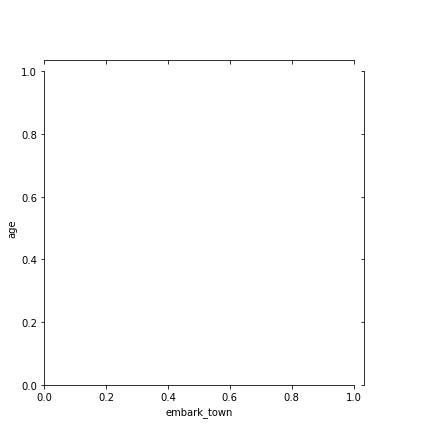

In [15]:
jg = sns.JointGrid(x="embark_town", y="age", data=df)
jg.plot(sns.regplot, sns.distplot)

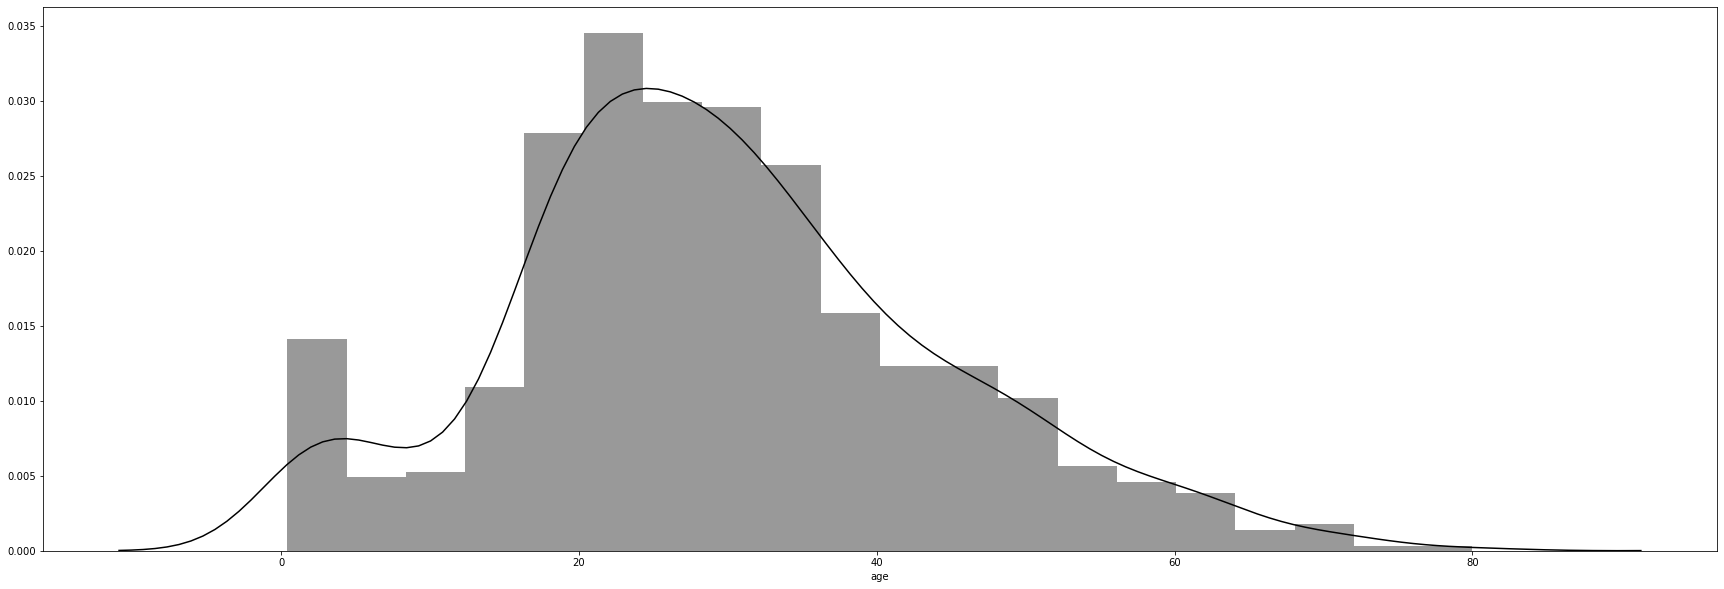

In [19]:
plot = sns.distplot(df.age, kde=True, color="Black")
fig = plt.gcf()
fig.set_size_inches(30,10)

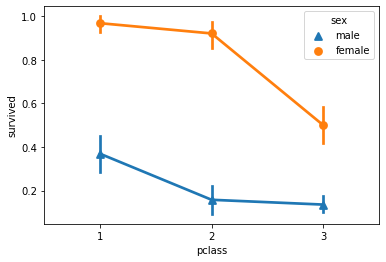

In [38]:
sns.pointplot(x="pclass", 
 y="survived", 
 hue="sex", 
 data=df,
 markers=["^","o"]
,dsdfd = {"male": "Blue", "female": "Pink" })

In [27]:
import requests
URL ='https://www.flipkart.com/search?q=laptop&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off'
page = requests.get(URL)
print(page.text)
from bs4 import BeautifulSoup
soup = BeautifulSoup(page.text)


<!DOCTYPE html>
<html lang="en">
<head>
	<link href="https://rukminim1.flixcart.com" rel="dns-prefetch" />
	<link href="https://img1a.flixcart.com" rel="dns-prefetch" />
	<link rel="stylesheet" href="//img1a.flixcart.com/www/linchpin/fk-cp-zion/css/app.chunk.8683fa.css" />

	<link rel="preload" href="//img1a.flixcart.com/www/linchpin/fk-cp-zion/img/fk-logo_9fddff.png" as="image">

	<meta http-equiv="Content-type" content="text/html; charset=utf-8"/>
	<meta http-equiv="X-UA-Compatible" content="IE=Edge" />
	<meta property="fb:page_id" content="102988293558"/>
	<meta property="fb:admins" content="658873552,624500995,100000233612389"/>
	<meta name="robots" content="noodp" />

	<link rel='shortcut icon' href="https://img1a.flixcart.com/www/promos/new/20150528-140547-favicon-retina.ico" />

	<link type="application/opensearchdescription+xml" rel="search" href="/osdd.xml?v=2"/>

	<meta property="og:type" content="website"/>
	<meta name="og_site_name" property="og:site_name" content="Flipkart

In [28]:
soup

<!DOCTYPE html>
<html lang="en">
<head>
<link href="https://rukminim1.flixcart.com" rel="dns-prefetch"/>
<link href="https://img1a.flixcart.com" rel="dns-prefetch"/>
<link href="//img1a.flixcart.com/www/linchpin/fk-cp-zion/css/app.chunk.8683fa.css" rel="stylesheet"/>
<link as="image" href="//img1a.flixcart.com/www/linchpin/fk-cp-zion/img/fk-logo_9fddff.png" rel="preload"/>
<meta content="text/html; charset=utf-8" http-equiv="Content-type"/>
<meta content="IE=Edge" http-equiv="X-UA-Compatible"/>
<meta content="102988293558" property="fb:page_id"/>
<meta content="658873552,624500995,100000233612389" property="fb:admins"/>
<meta content="noodp" name="robots"/>
<link href="https://img1a.flixcart.com/www/promos/new/20150528-140547-favicon-retina.ico" rel="shortcut icon"/>
<link href="/osdd.xml?v=2" rel="search" type="application/opensearchdescription+xml"/>
<meta content="website" property="og:type"/>
<meta content="Flipkart.com" name="og_site_name" property="og:site_name"/>
<!-- Appple Tou